# K-Means

## How K-Means Works:

- Initialization: Choose the number of clusters, K, and randomly select K initial cluster centroids.
  
- Assigning Points to Clusters: Assign each data point to the nearest centroid based on a distance metric (commonly Euclidean distance).
  
- Updating Centroids: Recalculate the centroids by taking the mean of all the data points assigned to each cluster.
  
- Repeat: Repeat the assignment and updating steps until the centroids no longer change (or until the algorithm converges).

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('driver-data.csv')
df.shape

(4000, 3)

Build a model to create the groups of the drivers based on mean_dist and mean_over_speed

In [3]:
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [4]:
features = df.drop(columns='id')

In [5]:
features.head()

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


In [6]:
import warnings 
warnings.filterwarnings('ignore')

In [7]:
kmeans = KMeans(n_clusters=3)

In [8]:
clusters = kmeans.fit(features)

In [9]:
np.unique(clusters.labels_)

array([0, 1, 2])

In [10]:
df['clusters'] = clusters.labels_

In [11]:
df

,id,mean_dist_day,mean_over_speed_perc,clusters
0,3423311935,71.24,28,0
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0
...,...,...,...,...
3995,3423310685,160.04,10,1
3996,3423312600,176.17,5,1
3997,3423312921,170.91,12,1
3998,3423313630,176.14,5,1


In [12]:
df[df['clusters']==0]
# df[df['clusters']==1]
# df[df['clusters']==2]

,id,mean_dist_day,mean_over_speed_perc,clusters
0,3423311935,71.24,28,0
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0
...,...,...,...,...
3195,3423312761,47.56,5,0
3196,3423314346,39.39,8,0
3197,3423313451,46.85,7,0
3198,3423313552,37.68,7,0


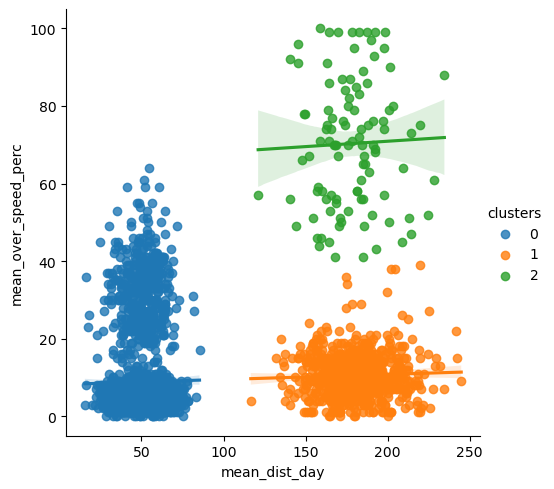

In [13]:
sns.lmplot(data=df,x='mean_dist_day',y='mean_over_speed_perc',hue='clusters')

In [14]:
clusters.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.34311782,  10.52011494],
       [177.83509615,  70.28846154]])

In [15]:
silhouette_score(features,clusters.labels_)

0.8231396834167266

In [16]:
kmeans.inertia_

992634.0606702475

## Elbow Method

In [17]:
inertia=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

In [18]:
print(inertia)

[12184626.129627978, 1316420.850947719, 992634.0606702475, 858309.7717412579, 620894.8937953893, 373074.8162897659, 330061.34770587226, 276977.0655687909, 255218.23025328663, 233518.93517481152]


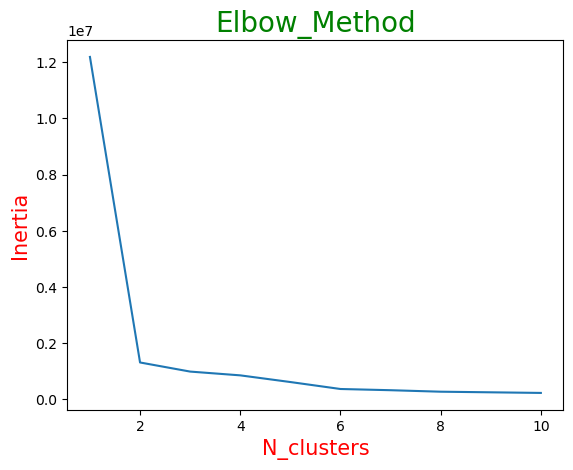

In [19]:
plt.plot(range(1,11),inertia)
plt.title('Elbow_Method',size=20,color='green')
plt.xlabel('N_clusters',size=15,color='red')
plt.ylabel('Inertia',size=15,color='red')
plt.show()

# Hierarchical clustering

Hierarchical clustering is an unsupervised machine learning technique that builds a hierarchy of clusters. Unlike methods such as K-Means, it doesn’t require specifying the number of clusters beforehand. Hierarchical clustering organizes the data into a tree-like structure called a dendrogram, where each branch represents a potential cluster.

## Types of Hierarchical Clustering:

### Agglomerative (Bottom-Up):

This is the most common form.
Start with each data point as its own cluster.
Iteratively merge the closest clusters until all data points belong to one single cluster or until the desired number of clusters is achieved.
In a dendrogram, the process is visualized as starting from individual points at the bottom and merging upwards.


### Divisive (Top-Down):

Start with all data points in one cluster.
Iteratively split clusters into smaller ones until each data point is its own cluster or until the desired number of clusters is achieved.
In a dendrogram, this starts from the top and splits downwards.

## How Agglomerative Hierarchical Clustering Works:

- Calculate Distance Matrix: Compute the distances between every pair of data points (commonly using Euclidean distance, Manhattan distance, etc.).

- Merge Closest Clusters: Begin by treating each data point as its own cluster. Merge the two clusters with the smallest distance between them.

- Recalculate Distance: After merging, update the distance matrix to reflect the new cluster formed by the merged points.

- Repeat: Continue merging clusters based on the smallest distance until all points are in a single cluster or until a predefined number of clusters is reached.

## Linkage Criteria:
To determine the distance between two clusters when performing the merging steps, different linkage criteria can be used:

- Single Linkage: The shortest distance between any point in one cluster and any point in the other cluster.
  
- Complete Linkage: The longest distance between any point in one cluster and any point in the other cluster.
  
- Average Linkage: The average distance between all pairs of points between the two clusters.

- Centroid Linkage: The distance between the centroids (mean points) of the two clusters.

In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

In [21]:
df = pd.read_csv('zoo.csv')
df.shape

(101, 18)

Build a model to create similar group of animals for the dataset

In [22]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [23]:
features = df.drop(columns=['animal_name','class_type'])
features

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


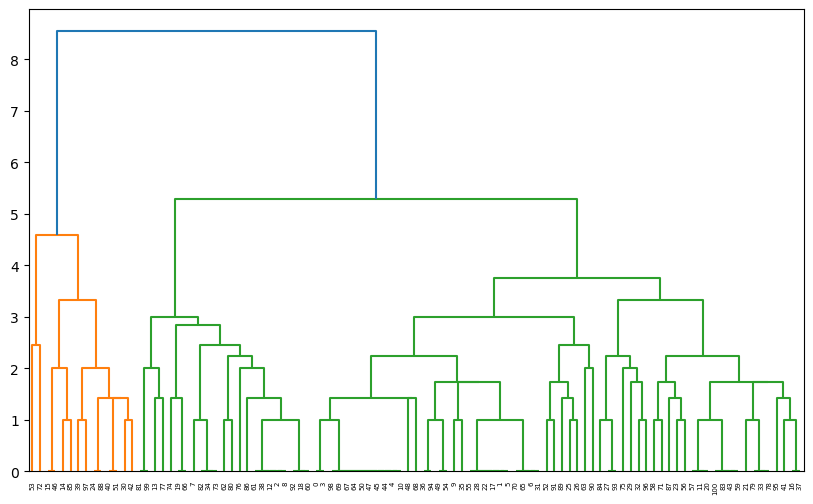

In [24]:
plt.figure(figsize=(10,6))
#dendrogram1 = sch.dendrogram(sch.linkage(features,method='single'))
dendrogram = sch.dendrogram(sch.linkage(features,method='complete'))
#dendrogram3 = sch.dendrogram(sch.linkage(features,method='average'))
#dendrogram4 = sch.dendrogram(sch.linkage(features,method='centroid'))
#dendrogram5 = sch.dendrogram(sch.linkage(features,method='ward'))

In [25]:
agg = AgglomerativeClustering(n_clusters=2,linkage='complete')

In [26]:
cluster = agg.fit(features)

In [27]:
cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [28]:
silhouette_score(features,cluster.labels_)

0.35977587608841377

# DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm used in unsupervised machine learning to find clusters in large datasets. Unlike K-Means or hierarchical clustering, DBSCAN does not require specifying the number of clusters in advance and can identify clusters of arbitrary shape. It is especially effective for datasets with noise or outliers.

## How DBSCAN Works

### DBSCAN relies on two main parameters

### eps (ε)
The maximum distance between two points for one to be considered as a neighbor of the other.
min_samples: The minimum number of points required to form a dense region (or cluster).
Based on these parameters, DBSCAN categorizes points into three types:

### Core points
A point that has at least min_samples points within a distance of eps.
Border points: A point that is within eps distance of a core point but does not have enough neighboring points to be a core point.

### Noise points (outliers)
A point that is neither a core point nor a border point, meaning it is in a low-density region.

## Steps of DBSCAN:

- Find Core Points: For each point in the dataset, calculate the number of neighbors within the distance eps. If the point has at least min_samples neighbors, it is labeled as a core point.

- Expand Cluster: Starting from each core point, all neighboring points (within eps distance) are added to the cluster. This process continues recursively, expanding the cluster by visiting all neighboring points and their neighbors, and so on.

- Classify Border and Noise Points: Once the clusters are formed, any points that are not core points but are within the eps distance of core points are classified as border points. Any point that does not belong to any cluster is classified as noise.

In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [30]:
df = pd.read_csv('Clustering.csv')
df.shape

(200, 5)

Build a model to create a groups and detact outliers

In [31]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [32]:
df.drop(columns=['CustomerID','Gender','Age'],inplace=True)
df.rename(columns={'Annual Income (k$)': 'Weight','Spending Score (1-100)':'Height'},inplace=True)

In [33]:
std_sca = StandardScaler()
df_new = pd.DataFrame(std_sca.fit_transform(df),columns=df.columns)
df_new.head()

,Weight,Height
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [35]:
eps = np.arange(0.1,0.7,0.1)
min_node = range(1,11)

In [38]:
output = []
for ep in eps:
    for mn in min_node:
        labels = DBSCAN(eps=ep,min_samples=mn).fit(df_new).labels_
        #score = silhouette_score(df_new,labels)
        output.append([ep,mn,score])

In [39]:
print(output)

[[0.1, 1, -0.28431740706316444], [0.1, 2, -0.28431740706316444], [0.1, 3, -0.28431740706316444], [0.1, 4, -0.28431740706316444], [0.1, 5, -0.28431740706316444], [0.1, 6, -0.28431740706316444], [0.1, 7, -0.28431740706316444], [0.1, 8, -0.28431740706316444], [0.1, 9, -0.28431740706316444], [0.1, 10, -0.28431740706316444], [0.2, 1, -0.28431740706316444], [0.2, 2, -0.28431740706316444], [0.2, 3, -0.28431740706316444], [0.2, 4, -0.28431740706316444], [0.2, 5, -0.28431740706316444], [0.2, 6, -0.28431740706316444], [0.2, 7, -0.28431740706316444], [0.2, 8, -0.28431740706316444], [0.2, 9, -0.28431740706316444], [0.2, 10, -0.28431740706316444], [0.30000000000000004, 1, -0.28431740706316444], [0.30000000000000004, 2, -0.28431740706316444], [0.30000000000000004, 3, -0.28431740706316444], [0.30000000000000004, 4, -0.28431740706316444], [0.30000000000000004, 5, -0.28431740706316444], [0.30000000000000004, 6, -0.28431740706316444], [0.30000000000000004, 7, -0.28431740706316444], [0.30000000000000004,

In [42]:
a = pd.DataFrame(output)
score = a.iloc[:,2].max()
score

-0.28431740706316444

In [43]:
a[a[2]==score]

,0,1,2
0,0.1,1,-0.284317
1,0.1,2,-0.284317
2,0.1,3,-0.284317
3,0.1,4,-0.284317
4,0.1,5,-0.284317
5,0.1,6,-0.284317
6,0.1,7,-0.284317
7,0.1,8,-0.284317
8,0.1,9,-0.284317
9,0.1,10,-0.284317


In [45]:
labels = DBSCAN(eps=0.2,min_samples=7).fit(df_new).labels_
np.unique(labels)

array([-1,  0,  1,  2,  3], dtype=int64)

<Axes: xlabel='Weight', ylabel='Height'>

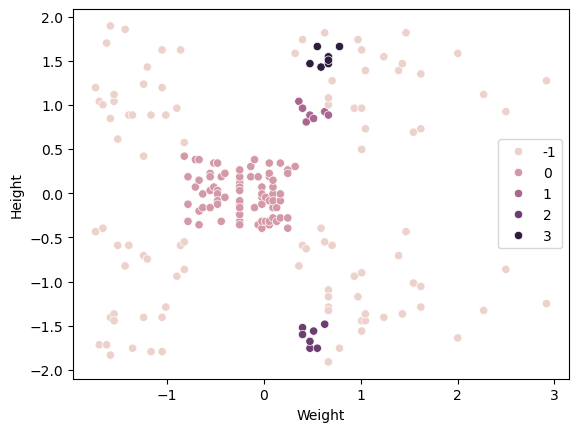

In [47]:
sns.scatterplot(data=df_new,x='Weight',y='Height',hue=labels)

In [48]:
import plotly.express as pe

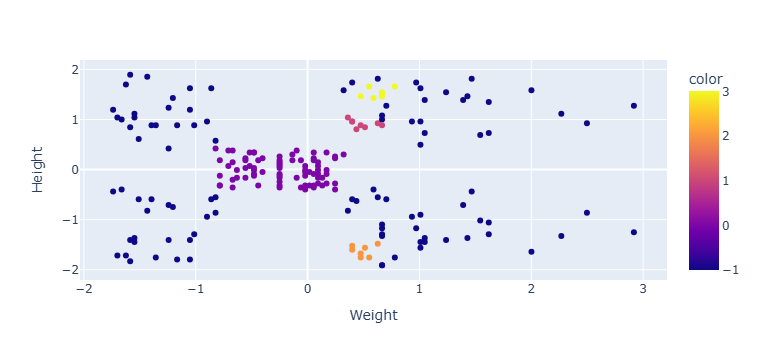

In [51]:
pe.scatter(df_new,x='Weight',y='Height',color=labels)

# Isolation Forest

In [52]:
df_new

,Weight,Height
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [53]:
from sklearn.ensemble import IsolationForest

In [62]:
iso = IsolationForest(n_estimators=100,contamination=0.05)

In [82]:
iso1 = iso.fit(df_new)
iso1

IsolationForest(contamination=0.05)

In [65]:
iso2 = iso1.predict(df_new)
iso2

array([ 1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1, -1])

In [71]:
index = np.where(iso2<0)
index

(array([  7,  11,  19, 192, 193, 195, 196, 197, 198, 199], dtype=int64),)

In [73]:
x = df_new.values
x

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [75]:
x[index,0]

array([[-1.62449091, -1.58632148, -1.43364376,  2.00160487,  2.00160487,
         2.26879087,  2.49780745,  2.49780745,  2.91767117,  2.91767117]])

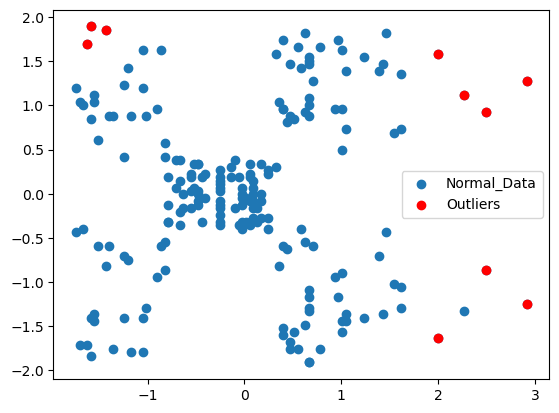

In [79]:
plt.scatter(x[:,0],x[:,1],label='Normal_Data')
plt.scatter(x[index,0],x[index,1],label='Outliers',color='red')
plt.legend()

<Axes: >

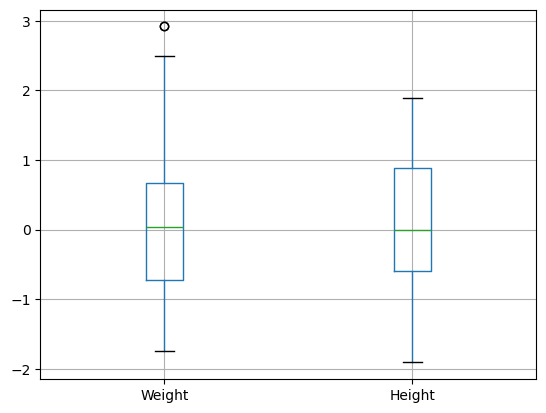

In [81]:
df_new.boxplot()            # Not required